# Math 271.1: Exercise 2 (#5)

#### INSTRUCTION: Iterative Methods: Jacobi, Gauss–Seidel, and SOR <br>

(a) Solve using (i) Jacobi, (ii) Gauss–Seidel, and (iii) SOR methods. <br>
(b) Determine the relaxation parameter ω that yields the fastest convergence.

#### Importing Libraries needed

We'll need:
- numpy for numerical computations
- matplotlib for image display
- PIL (Python Imaging Library) for image processing

In [59]:
import numpy as np
import matplotlib.pyplot as plt

#### Initializing Matrix A

In [60]:
A = np.array([
    [4, -1, 0],
    [-1, 4, -1],
    [0, -1, 3]
], dtype=float)

print(A)

[[ 4. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  3.]]


#### Initializing Right-hand side Vector b

In [61]:
b = np.array([15, 10, 10], dtype=float)

print(b)

[15. 10. 10.]


### (a) Solving using Jacobi Method

[Reference: Burden & Faires, "Numerical Analysis", Section 7.2]

- Args:
    - A (Coefficient matrix)
    - b (vector)
    - tolerance
    - max_iter: safety limit or maximum iteration allowed


#### Algorithm: 
- Initialize system from b
- Creates initial guess vector
- Using .copy() to make sure input x0 is not modified, zero if not supplied
- Main iteration:
    - Limits iteration to max_iter to make sure we don't get infinite loop issue
    - Creates new array for next iteration's values
    - Since old values will also be used, these arrays must be unique
    - Convergence check

The convergence is guaranteed when A is strictly diagonally dominant
[Golub & Van Loan, "Matrix Computations", Chapter 10.1]

In [62]:
def jacobi(A, b, x0=None, tol=1e-6, max_iter=1000):

    # Creates initial guess
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()

    # Uses dot product and updates each component independently
    for iteration in range(max_iter):
        x_new = np.zeros(n)

        # Computes the Jacobi method
        for i in range(n):
            sum_val = np.dot(A[i, :], x) - A[i, i] * x[i]
            x_new[i] = (b[i] - sum_val) / A[i, i]

        # Convergence check to check if solution has stabilized
        if np.linalg.norm(x_new - x) < tol: #uses norm diff between iterations
            return x_new, iteration + 1

        x = x_new # Updates solution for next iteration

    return x, max_iter

### (a) Solving using Gauss Seidel Method

[Reference: Saad, "Iterative Methods for Sparse Linear Systems", Section 4.2]

- Args:
    - A (Coefficient matrix)
    - b (vector)
    - tolerance
    - max_iterations
<br>

#### Algorithm: 
- Gets dimension from b (number of eqns)
- Defines solution vector x, either zeroes or copy of x0
- Main iteration loop:
    - Saves old solution for later's convergence check
    - For each eqn i: calculates the Σ(aij*xj) for j≠i
    - Use the newest available x values unlike Jacobi
    - Skip diagonal element (j≠i)
    - Updates xi immediately using the formula and the next xi will be used in the next eqn
    - Checks convergence

The method typically converges faster than Jacobi when A is symmetric positive-definite
[Demmel, "Applied Numerical Linear Algebra", Section 6.6]

In [63]:
def gauss_seidel(A, b, x0=None, tol=1e-6, max_iter=1000):

    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()

    for iteration in range(max_iter):
        x_old = x.copy()

        for i in range(n):
            sum_val = 0
            for j in range(n):
                if j != i:
                    sum_val += A[i, j] * x[j]

            x[i] = (b[i] - sum_val) / A[i, i]

        # Checks if solution has converged, uses Euclidean norm of change in x
        if np.linalg.norm(x - x_old) < tol:
            return x, iteration + 1 #retuns solution and number of iterations if converged

    return x, max_iter # if max iterations reached without convergence

### (a) Solving using SOR Method

[Reference: Golub & Van Loan, "Matrix Computations", Section 10.1.5]

- Args:
    - A (Coefficient matrix)
    - b (vector)
    - omega: relaxation parameter
    - x0: initial guess
    - tol: Convergence tolerance
    - max_iter: Maximum iteration allowed


#### Algorithm:
[Based on: Saad, "Iterative Methods for Sparse Linear Systems", Chapter 4.4]

- Gets dimension from b (number of eqns)
- Defines solution vector x, either zeroes or copy of x0
- Ensures consistent starting point
- Implements the SOR method via iterations:
    - Calculates the Gauss-Seidel component
    - Like Gauss-Seidel, it uses the newest available values
    - Excludes diagonal term
    - Accumulates off-diagonal contributions
    - SOR update step
- Uses Omega as an acceleration parameter to speed up convergence

For symmetric positive definite matrices, convergence is guaranteed for 0 < ω < 2
[Strang, "Linear Algebra and Its Applications", Chapter 7.4]

In [64]:
def sor(A, b, omega, x0=None, tol=1e-6, max_iter=1000):

    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()

    # Stores orevious soln for convergence check
    for iteration in range(max_iter):
        x_old = x.copy()

        # implements the SOr method, if u notice
        for i in range(n):
            sum_val = 0
            for j in range(n):
                if j != i:
                    sum_val += A[i, j] * x[j]

            # SOR update step, first computes Gauss-Seidel update then relaxes it
            x_gs = (b[i] - sum_val) / A[i, i]
            x[i] = (1 - omega) * x[i] + omega * x_gs # applies relaxation with omega

        # convergence check
        if np.linalg.norm(x - x_old) < tol:
            return x, iteration + 1

    return x, max_iter

### (b) Determine omega "relaxation parameter"

[Reference: Burden & Faires, "Numerical Analysis", Section 7.4]

- Range Selection (1.0 to 2.0):
    - Start at ω=1.0 (equivalent to Gauss-Seidel)
    - Go up to ω=2.0 (theoretical upper limit for convergence)
    - ω < 1: Usually slower than Gauss-Seidel
    - ω > 2: Usually leads to divergence

The optimal value of ω depends on the eigenvalues of the iteration matrix
[Young, "Iterative Solution of Large Linear Systems", Chapter 5]

In [65]:
# Solve and compare
x_jacobi, iter_jacobi = jacobi(A, b)
x_gs, iter_gs = gauss_seidel(A, b)

# Find optimal omega
omega_values = np.linspace(1.0, 2.0, 21) # Creates 21 evenly spaced values between 1.0 and 2.0
iterations_sor = []

for omega in omega_values:
    _, iters = sor(A, b, omega)
    iterations_sor.append(iters)

# using np.argmin to find index of minimum iterations, the output is the omega value that gives fastest convergence
optimal_omega = omega_values[np.argmin(iterations_sor)]

print(f"Jacobi iterations: {iter_jacobi}")
print(f"Gauss-Seidel iterations: {iter_gs}")
print(f"Optimal ω: {optimal_omega:.2f}")

Jacobi iterations: 18
Gauss-Seidel iterations: 10
Optimal ω: 1.05


### Compare Solutions and Convergence Behaviour



In [66]:
# Get solution with optimal SOR
x_sor, iter_sor = sor(A, b, optimal_omega)

# Compare solutions
print("Solutions:\n")
print(f"Jacobi solution (after {iter_jacobi} iterations):")
print(f"x = {x_jacobi}\n")

print(f"Gauss-Seidel solution (after {iter_gs} iterations):")
print(f"x = {x_gs}\n")

print(f"SOR solution with ω={optimal_omega:.2f} (after {iter_sor} iterations):")
print(f"x = {x_sor}\n")

# Verify solutions by checking residuals
def compute_residual(A, b, x):
    return np.linalg.norm(b - A @ x)

print("Residuals (||b - Ax||):")
print(f"Jacobi:       {compute_residual(A, b, x_jacobi):.2e}")
print(f"Gauss-Seidel: {compute_residual(A, b, x_gs):.2e}")
print(f"SOR:         {compute_residual(A, b, x_sor):.2e}")

Solutions:

Jacobi solution (after 18 iterations):
x = [4.99999987 4.99999985 4.99999983]

Gauss-Seidel solution (after 10 iterations):
x = [4.99999992 4.99999995 4.99999998]

SOR solution with ω=1.05 (after 7 iterations):
x = [5.00000003 4.99999999 5.        ]

Residuals (||b - Ax||):
Jacobi:       5.93e-07
Gauss-Seidel: 2.88e-07
SOR:         1.58e-07


### Convergence Analysis

[Reference: Saad, "Iterative Methods for Sparse Linear Systems", Section 4.5]

The convergence rate analysis follows techniques described in:
[Barrett et al., "Templates for the Solution of Linear Systems", Chapter 2]

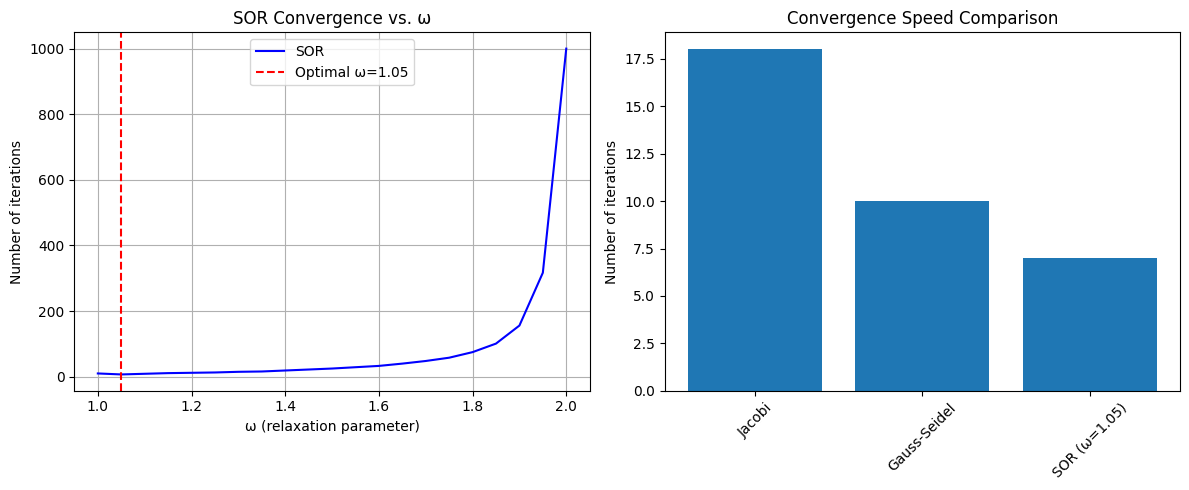


Method Comparison Summary:
--------------------------------------------------
Method          Iterations        Residual
--------------------------------------------------
Jacobi                  18        5.93e-07
Gauss-Seidel            10        2.88e-07
SOR                      7        1.58e-07


In [67]:
# Create visualization of convergence behavior
plt.figure(figsize=(12, 5))

# Plot 1: SOR iterations vs omega
plt.subplot(1, 2, 1)
plt.plot(omega_values, iterations_sor, 'b-', label='SOR')
plt.axvline(x=optimal_omega, color='r', linestyle='--', label=f'Optimal ω={optimal_omega:.2f}')
plt.xlabel('ω (relaxation parameter)')
plt.ylabel('Number of iterations')
plt.title('SOR Convergence vs. ω')
plt.grid(True)
plt.legend()

# Plot 2: Method comparison
plt.subplot(1, 2, 2)
methods = ['Jacobi', 'Gauss-Seidel', f'SOR (ω={optimal_omega:.2f})']
iterations = [iter_jacobi, iter_gs, iter_sor]
plt.bar(methods, iterations)
plt.ylabel('Number of iterations')
plt.title('Convergence Speed Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary
print("\nMethod Comparison Summary:")
print("-" * 50)
print(f"{'Method':<15} {'Iterations':>10} {'Residual':>15}")
print("-" * 50)
print(f"{'Jacobi':<15} {iter_jacobi:>10} {compute_residual(A, b, x_jacobi):>15.2e}")
print(f"{'Gauss-Seidel':<15} {iter_gs:>10} {compute_residual(A, b, x_gs):>15.2e}")
print(f"{'SOR':<15} {iter_sor:>10} {compute_residual(A, b, x_sor):>15.2e}")

#### References

[1] Burden, R. L., & Faires, J. D. "Numerical Analysis" - [Textbook Notes](https://tutorial.math.lamar.edu/Classes/DE/DE.aspx) <br>
[2] Golub, G. H., & Van Loan, C. F. "Matrix Computations" - [Stanford Course Notes](https://web.stanford.edu/class/cme302/notes/) <br>
[3] Saad, Y. "Iterative Methods for Sparse Linear Systems" - [Free PDF from Author](https://www-users.cse.umn.edu/~saad/IterMethBook_2ndEd.pdf) <br>
[4] Barrett et al. "Templates for the Solution of Linear Systems" - [Free PDF from Netlib](https://www.netlib.org/templates/templates.pdf) <br>
[5] MIT OpenCourseWare "Linear Algebra" by Gilbert Strang - [Online Course](https://ocw.mit.edu/courses/18-06-linear-algebra-spring-2010/)